<a href="https://colab.research.google.com/github/NatthanichaBoonluea/cs246-Entertainment-of-TU-Students-Data-Visualization/blob/main/%E0%B8%AA%E0%B8%B3%E0%B9%80%E0%B8%99%E0%B8%B2%E0%B8%82%E0%B8%AD%E0%B8%87_%E0%B8%81%E0%B8%A5%E0%B8%B8%E0%B9%88%E0%B8%A1%E0%B8%AD%E0%B8%B8%E0%B8%95%E0%B8%AA%E0%B8%B2%E0%B8%AB%E0%B8%81%E0%B8%A3%E0%B8%A3%E0%B8%A1%E0%B8%84%E0%B8%A7%E0%B8%B2%E0%B8%A1%E0%B8%9A%E0%B8%B1%E0%B8%99%E0%B9%80%E0%B8%97%E0%B8%B4%E0%B8%87.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary tools and dataset

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.colors as pc
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter("ignore")

In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
!wget -q http://www.arts.chula.ac.th/ling/wp-content/uploads/TH-Sarabun_Chula1.1.zip -O font.zip
!unzip -qj font.zip TH-Sarabun_Chula1.1/THSarabunChula-Regular.ttf
mpl.font_manager.fontManager.addfont('THSarabunChula-Regular.ttf')
mpl.rc('font', family='TH Sarabun Chula')

In [ ]:
url ='https://drive.google.com/file/d/1iZO3jY6DcGmn7-1z3BWeDAlkMpTOK3SU/view?usp=sharing'
file_id=url.split('/')[-2]
dwn_url ='https://drive.google.com/uc?id='+file_id

In [ ]:
df = pd.read_csv(dwn_url)

## Data Preprocessing

In [ ]:
df.columns

Index(['Timestamp', 'Email Address', 'เพศ', 'รหัสนักศึกษา 2 ตัวแรก',
       'คณะ (สาขา/เอก) ที่คุณกำลังศึกษาอยู่',
       'เวลาที่คุณเครียด หรือไม่สบายใจ คุณมักจะใช้กิจกรรมความบันเทิงด้านไหนมากที่สุด (โปรดเลือกกิจกรรมที่คุณใช้มากที่สุด 1 ข้อ)',
       'คุณดูหนังเพื่อคลายความเครียดบ่อยแค่ไหนต่อสัปดาห์',
       'หนังประเภทใดที่ช่วยคลายความเครียดของคุณได้มากที่สุด',
       'คุณมักจะดูหนังช่องทางไหนเมื่อรู้สึกเครียด',
       'ปกติคุณใช้เงินไปกับการดูหนังเป็นกิจกรรมคลายเครียดเดือนละเท่าไหร่',
       'คุณจะให้คะแนนความพอใจในการเข้าใช้บริการดูหนังของห้องสมุดป๋วยมากน้อยเพียงใด',
       'คุณอยากให้มหาลัยให้บริการดูสตรีมมิ่งออนไลน์ฟรีบนแพลตฟอร์มไหนมากที่สุด',
       'คุณคิดว่าการมีเพื่อนดูหนังสามารถเป็นกิจกรรมทางสังคมที่ช่วยลดความเครียดได้มากน้อยเพียงใด',
       'คุณอยากให้มีความถี่ในการจัดงานดูหนังกลางแปลงภายในมหาวิทยาลัยมากน้อยแค่ไหน',
       'ช่วงไหนที่คุณอยากไปงานดูหนังกลางแปลงภายในมหาวิทยาลัยเพื่อคลายความเครียดบ้าง (เลือกได้มากกว่า 1 ข้อ)',
       'เหตุผลที่ไม่อยากให้มีการจัดงานดูหนังกลางแป

In [ ]:
df.columns = ['timestamp', 'email', 'gender', 'student_id','major','category',
              'm_frequent','m_type','m_platform','m_money','m_satisfy','m_streaming','m_friend','m_fre_ac','m_when_ac','m_whynot_ac',
              's_beat','s_lyrics','s_where_ac','s_factor','s_stream','s_ac','s_satisfy','s_freq','s_when_ac','s_whynot_ac',
              'g_choose','g_type','g_activity','g_platform','g_fre_week','g_fre_ac','g_fre_ac/1','g_when_ac','g_whynot_ac']

In [ ]:
#check duplicate
df.email.duplicated().sum()

0

In [ ]:
df.drop(["email","timestamp"],axis=1,inplace=True)

In [ ]:
df

,gender,student_id,major,category,m_frequent,m_type,m_platform,m_money,m_satisfy,m_streaming,...,s_whynot_ac,g_choose,g_type,g_activity,g_platform,g_fre_week,g_fre_ac,g_fre_ac/1,g_when_ac,g_whynot_ac
0,หญิง,64,พยาบาลศาสตร์,เกม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"ทำให้รู้สึกผ่อนคลายและเพลิดเพลิน, ช่วยลืมความก...",เกมต่อสู้ (Fighting Game),"มีพื้นที่สำหรับการเล่นเกมโดยเฉพาะ, มีการจัดกิจ...",Mobile / โทรศัพท์มือถือ,มากกว่า 6 ครั้ง / สัปดาห์,มากกว่า 4 ครั้ง / เทอม,1-2 ครั้ง / เทอม,"หลังสอบ, เทศกาลสำคัญ",NaN
1,หญิง,62,พยาบาลศาสตร์,เกม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"ทำให้รู้สึกผ่อนคลายและเพลิดเพลิน, ช่วยลืมความก...",เกมปริศนาไข (Puzzle games),มีการจัดกิจกรรมเกี่ยวกับการแข่งเกม E-sports,Mobile / โทรศัพท์มือถือ,2-4 ครั้ง / สัปดาห์,1-2 ครั้ง / เทอม,ไม่เคยรู้ว่ามีกิจกรรม,หลังสอบ,NaN
2,LGBTQ+,64,วิทยาศาสตร์และเทคโนโลยี (วิทยาการคอมพิวเตอร์),เกม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"ทำให้รู้สึกผ่อนคลายและเพลิดเพลิน, สามารถเล่นกั...",เกมต่อสู้กันระหว่าง (Moba),จัดกิจกรรมเกี่ยวกับเกมเพื่อการศึกษา,Mobile / โทรศัพท์มือถือ,น้อยกว่า 2 ครั้ง / สัปดาห์,1-2 ครั้ง / เทอม,ไม่เคยรู้ว่ามีกิจกรรม,หลังสอบ,NaN
3,ชาย,65,วิทยาศาสตร์และเทคโนโลยี (วิทยาศาสตร์และนวัตกรร...,เกม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"ทำให้รู้สึกผ่อนคลายและเพลิดเพลิน, สามารถเล่นกั...",เกมยิงปืน (Shooting games),มีการจัดกิจกรรมการแชร์ประสบการณ์การเล่นเกม,PC / เครื่องคอมพิวเตอร์,2-4 ครั้ง / สัปดาห์,มากกว่า 4 ครั้ง / เทอม,1-2 ครั้ง / เทอม,"หลังสอบ, เทศกาลสำคัญ",NaN
4,ชาย,64,วิทยาศาสตร์และเทคโนโลยี (วิทยาการคอมพิวเตอร์),เกม,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"ทำให้รู้สึกผ่อนคลายและเพลิดเพลิน, สามารถเล่นกั...",เกมจำลองสถานการณ์ (Simulation),"มีพื้นที่สำหรับการเล่นเกมโดยเฉพาะ, มีการจัดกิจ...",PC / เครื่องคอมพิวเตอร์,มากกว่า 6 ครั้ง / สัปดาห์,3-4 ครั้ง / เทอม,1-2 ครั้ง / เทอม,"หลังสอบ, เทศกาลสำคัญ",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,หญิง,64,สหเวชศาสตร์ (กายภาพบำบัด),หนัง,มากกว่า 4 ครั้ง / สัปดาห์,Animation,"บริการสตรีมมิ่ง (เช่น Netflix, HBO Go)",300 - 500 บาท,พอใจ,HBO Go,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,หญิง,64,สาธารณสุขศาสตร์ (อาชีวอนามัยและความปลอดภัย),หนัง,2 - 4 ครั้ง / สัปดาห์,Sci-fi,"บริการสตรีมมิ่ง (เช่น Netflix, HBO Go)",น้อยกว่า 300 บาท,พอใจ,HBO Go,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,หญิง,64,วิทยาศาสตร์และเทคโนโลยี (วิทยาการคอมพิวเตอร์),หนัง,น้อยกว่า 2 ครั้ง / สัปดาห์,Animation,"บริการสตรีมมิ่ง (เช่น Netflix, HBO Go)",น้อยกว่า 300 บาท,ไม่เคยใช้บริการ,Disney+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,ชาย,63,วิทยาศาสตร์และเทคโนโลยี (วิทยาศาสตร์และนวัตกรร...,หนัง,2 - 4 ครั้ง / สัปดาห์,Animation,"บริการสตรีมมิ่ง (เช่น Netflix, HBO Go)",น้อยกว่า 300 บาท,ไม่พอใจ,Netflix,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Overall

###แผนภูมิวงกลมแสดงสัดส่วนของผู้ตอบแบบสอบถามจำแนกตามเพศ

In [ ]:
grouped_dfm = df['gender'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=['#E45756','#F58518','#47B39C','#1D3557']))
fig.update_layout(title='แผนภูมิวงกลมแสดงสัดส่วนของผู้ตอบแบบสอบถามจำแนกตามเพศ',
                  plot_bgcolor='white',
                  height=500,
                  width=900,
                  font=dict(size=13, color='black', family='Helvetica'),
                  title_font=dict(size=20, color='black', family='Helvetica'),
                  showlegend=True)
fig.update_layout(title_x=0.5)
fig.show()


##แผนภูมิวงกลมแสดงสัดส่วนของผู้ตอบแบบสอบถามจำแนกตามรหัสนักศึกษา 2 ตัวแรก

In [ ]:
grouped_dfm = df['student_id'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=['#FFC300', '#FF5733', '#C70039', '#900C3F']))
fig.update_layout(title='แผนภูมิวงกลมแสดงสัดส่วนของผู้ตอบแบบสอบถามจำแนกตามรหัสนักศึกษา 2 ตัวแรก',
                  plot_bgcolor='white',
                  height=500,
                  width=900,
                  font=dict(size=13, color='black', family='Helvetica'),
                  title_font=dict(size=20, color='black', family='Helvetica'),
                  showlegend=True)
fig.update_layout(title_x=0.5)
fig.show()


##แผนภูมิแท่งแสดงสัดส่วนผู้ตอบแบบสอบถามจำแนกตามคณะและสาขาวิชา

In [ ]:
m_when_ac_counts = df['major'].astype(str).str.strip().replace(' ', '', regex=True)
m_when_ac_counts = m_when_ac_counts.str.split(',', expand=True).stack().value_counts().reset_index()
m_when_ac_counts.columns = ['choice', 'frequency']
m_when_ac_counts = m_when_ac_counts[m_when_ac_counts['choice'] != 'nan']

# Calculate the percentage values
m_when_ac_counts['percentage'] = m_when_ac_counts['frequency'] / m_when_ac_counts['frequency'].sum() * 100
m_when_ac_counts['text'] = m_when_ac_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(m_when_ac_counts, x='frequency', y='choice', orientation='h',
             color='frequency', color_continuous_scale='turbo',labels={'frequency':'ความถี่', 'choice':'คณะ/สาขา'})
fig.update_layout(title='แผนภูมิแท่งแสดงสัดส่วนของผู้ตอบแบบสอบถามจำแนกตามคณะและสาขาวิชา',
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, m_when_ac_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=100, r=50, b=50, t=80),
    height=600,
    width=1000,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=22, color='black', family='Helvetica'),
)
fig.update_layout(title_x=0.5)

# Add the frequency and percentage values beside the bars
fig.update_traces(text=m_when_ac_counts['text'], textposition='outside')

fig.show()


In [ ]:
grouped_dfm = df['category'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=['#E45756','#F58518','#47B39C','#1D3557']))
fig.update_layout(title='แผนภูมิวงกลมแสดงที่ผู้ตอบแบบสอบถามเลือกใช้อุตสาหกรรมความบันเทิงแต่ละประเภทในการคลายความเครียด',
                  plot_bgcolor='white',
                  height=500,
                  width=900,
                  font=dict(size=13, color='black', family='Helvetica'),
                  title_font=dict(size=20, color='black', family='Helvetica'),
                  showlegend=True)
fig.update_layout(title_x=0.5)
fig.show()


#MUSIC

In [ ]:
df_ms = df[df['category'] == 'เพลง']

###แผนภูมิวงกลมแสดงจำนวนนักศึกษาที่เลือกเพลงเพื่อคลายความเครียดจำแนกตามเพศ

In [ ]:
import plotly.express as px

grouped_dfm = df_ms['gender'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงจำนวนนักศึกษาที่เลือกเพลงเพื่อคลายความเครียดจำแนกตามเพศ',
                  plot_bgcolor='white',
                  height=500,
                  width=850,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=20, color='black', family='Helvetica'),
                  showlegend=True)
fig.show()

###Word Cloud แสดงรูปแบบของเพลงตามจังหวะ ประเภทที่ฟังเพื่อคลายความเครียดมากที่สุด





In [ ]:
df_ms = df_ms.replace('ป๊อป (POP)','POP')
df_ms = df_ms.replace('ริทึมแอนด์บลูส์ (R&B)','RB')
df_ms = df_ms.replace('อิเล็กทรอนิกส์ (Electronic)','Electronic')
df_ms = df_ms.replace('แจ๊ส (Jazz)','Jazz')
df_ms = df_ms.replace('เพลงบรรเลง (Instrumental)','Instrumental')
df_ms = df_ms.replace('ร็อก (Rock)','Rock')
df_ms = df_ms.replace('คลาสสิก (Classic)','Classic')
df_ms = df_ms.replace('ฮิปฮอป (Hip hop)','HipHop')

b1 = len(df_ms[df_ms['s_beat'] == 'POP'])
b2 =len(df_ms[df_ms['s_beat'] == 'R&B'])
b3 =len(df_ms[df_ms['s_beat'] == 'Electronic'])
b4 =len(df_ms[df_ms['s_beat'] == 'Jazz'])
b5 =len(df_ms[df_ms['s_beat'] == 'Instrumental'])
b6 =len(df_ms[df_ms['s_beat'] == 'Rock'])
b7 =len(df_ms[df_ms['s_beat'] == 'Classic'])
b8 =len(df_ms[df_ms['s_beat'] == 'Hip hop'])

ms_beat= {'Name':['POP','R&B','Electronic',
                'Jazz','Instrumental','Rock',
                'Classic','Hip hop'], 'count_sbeat':[b1,b2,b3,b4,b5,b6,b7,b8,]}
df_ms_beat = pd.DataFrame(ms_beat)

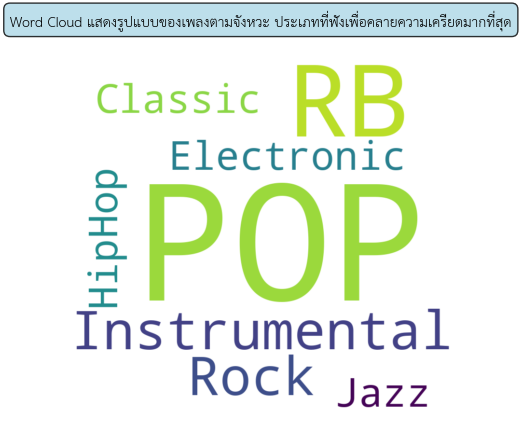

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all m_type values into a single string
text = ' '.join(df_ms['s_beat'].astype(str).tolist())

# Generate word cloud image
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)
plt.figure(figsize=(5, 5))
# Create a title with a colored rectangle behind it
title = 'Word Cloud แสดงรูปแบบของเพลงตามจังหวะ ประเภทที่ฟังเพื่อคลายความเครียดมากที่สุด'
title_box = dict(boxstyle='round', facecolor='lightblue', alpha=0.8)
plt.text(0.5, 1.05, title, size=15, ha='center', va='center', transform=plt.gca().transAxes, bbox=title_box)

# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('m_friend.png', dpi=1200)
plt.show()


###คุณชอบฟังเพลงในรูปแบบของเพลงตามเครื่องดนตรีและเนื้อหา ประเภทใดเพื่อคลายความเครียดมากที่สุด

In [ ]:
import plotly.express as px

grouped_dfm = df['s_lyrics'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิแสดงพลงในรูปแบบของเพลงตามเครื่องดนตรีและเนื้อหา ประเภทใดเพื่อคลายความเครียดมากที่สุด',
                  plot_bgcolor='white',
                  height=500,
                  width=750,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=16, color='black', family='Helvetica'),
                  showlegend=True)
fig.show()

###แผนภูมิวงกลมแสดงอิทธิพลที่มีผลต่อการเลือกฟังเพลงเพื่อคลายความเครียดมากที่สุด

In [ ]:
df_ms = df_ms.replace('ทำนองเพลง','ทำนอง')

In [ ]:
df_ms.s_factor.unique()

array(['กำลังเป็นที่นิยม', 'เครื่องดนตรีและเนื้อเสียงคนร้อง', 'จังหวะ',
       'ทำนอง', 'เนื้อหาของเพลง', 'ประเภทของเพลง', 'ศิลปิน'], dtype=object)

In [ ]:
import plotly.express as px

grouped_dfm = df_ms['s_factor'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงอิทธิพลที่มีผลต่อการเลือกฟังเพลงเพื่อคลายความเครียดมากที่สุด',
                  plot_bgcolor='white',
                  height=500,
                  width=800,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=22, color='black', family='Helvetica'),
                  showlegend=True)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

###แผนภูมิแท่งแสดงการรับฟังเพลงจากแหล่งต่าง ๆ เพื่อคลายความเครียด

In [ ]:
m_when_ac_counts = df_ms['s_stream'].astype(str).str.strip().replace(' ', '', regex=True)
m_when_ac_counts = m_when_ac_counts.str.split(',', expand=True).stack().value_counts().reset_index()
m_when_ac_counts.columns = ['choice', 'frequency']

# Calculate the percentage values
m_when_ac_counts['percentage'] = (m_when_ac_counts['frequency'] / len(df_ms['s_stream'])) * 100
m_when_ac_counts['text'] = m_when_ac_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(m_when_ac_counts, x='frequency', y='choice', orientation='h',
             color='frequency', color_continuous_scale='burg',
             title='แผนภูมิแท่งแสดงการรับฟังเพลงจากแหล่งต่าง ๆ เพื่อคลายความเครียด',
             labels={'frequency':'Frequency', 'choice':'Choice'})
fig.update_layout(
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, m_when_ac_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=100, r=50, b=50, t=80),
    height=500,
    width=800,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=22, color='black', family='Helvetica'),
)

# Add the frequency and percentage values beside the bars
fig.update_traces(text=m_when_ac_counts['text'], textposition='outside')
#plt.savefig('s.png', dpi=300)
fig.show()


###แผนภูมิวงกลมการเข้าร่วมงานดนตรีภายในมหาวิทยาลัยเพื่อคลายความเครียด

In [ ]:
import plotly.express as px

grouped_dfm = df['s_ac'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='การเข้าร่วมงานดนตรีภายในมหาวิทยาลัยเพื่อคลายความเครียด',
                  plot_bgcolor='white',
                  height=500,
                  width=700,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=22, color='black', family='Helvetica'),
                  showlegend=True)
fig.show()

###คะแนนความพึงพอใจจากการเข้าร่วมงานดนตรีมากน้อยเพียงใด

In [ ]:
pre_ms = df_ms[df_ms['s_satisfy']!='ไม่เคยเข้าร่วม']

In [ ]:
#Bar Chart
m_when_ac_counts = pre_ms['s_satisfy'].astype(str).str.strip().replace(' ', '', regex=True)
m_when_ac_counts = m_when_ac_counts.str.split(',', expand=True).stack().value_counts().reset_index()
m_when_ac_counts.columns = ['choice', 'frequency']

# Calculate the percentage values
m_when_ac_counts['percentage'] = m_when_ac_counts['frequency'] / m_when_ac_counts['frequency'].sum() * 100
m_when_ac_counts['text'] = m_when_ac_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(m_when_ac_counts, x='frequency', y='choice',
             color='frequency', color_continuous_scale='burg',
             title='แผนภูมิแท่งแสดงคะแนนความพึงพอใจในการเข้าร่วมงานดนตรี',
             labels={'frequency':'Frequency', 'choice':'Choice'})
fig.update_layout(
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, m_when_ac_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=100, r=50, b=50, t=80),
    height=500,
    width=800,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=22, color='black', family='Helvetica'),
)

# Add the frequency and percentage values beside the bars
fig.update_traces(text=m_when_ac_counts['text'], textposition='outside')

fig.show()


###แผนภูมิแท่งแสดงสถานที่ที่นักศึกษาอยากให้จัดงานดนตรีภายในมหาวิทยาลัยมากที่สุด

In [ ]:
m_where_ac_counts = df_ms['s_where_ac'].astype(str).str.strip().replace(' ', '', regex=True)
m_where_ac_counts = m_where_ac_counts.str.split(',', expand=True).stack().value_counts().reset_index()
m_where_ac_counts.columns = ['choice', 'frequency']
m_where_ac_counts = m_where_ac_counts[m_where_ac_counts['choice'] != 'nan']

# Calculate the percentage values
m_where_ac_counts['percentage'] = m_where_ac_counts['frequency'] / m_where_ac_counts['frequency'].sum() * 100
m_where_ac_counts['text'] = m_where_ac_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(m_where_ac_counts, x='frequency', y='choice', orientation='h',
             color='frequency', color_continuous_scale='burg',
             title='แผนภูมิแท่งแสดงสถานที่ที่นักศึกษาอยากให้จัดงานดนตรีภายในมหาวิทยาลัยมากที่สุด',
             labels={'frequency':'ความถี่', 'choice':'สถานที่'})
fig.update_layout(
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, m_when_ac_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=100, r=50, b=50, t=80),
    height=500,
    width=800,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=21, color='black', family='Helvetica'),
)

# Add the frequency and percentage values beside the bars
fig.update_traces(text=m_when_ac_counts['text'], textposition='outside')

fig.show()

###คุณอยากให้มีความถี่ในการจัดงานดนตรีภายในมหาวิทยาลัยมากน้อยแค่ไหน

In [ ]:
m_when_ac_counts = df_ms['s_freq'].astype(str).str.strip().replace(' ', '', regex=True)
m_when_ac_counts = m_when_ac_counts.str.split(',', expand=True).stack().value_counts().reset_index()
m_when_ac_counts.columns = ['choice', 'frequency']

# Calculate the percentage values
m_when_ac_counts['percentage'] = m_when_ac_counts['frequency'] / m_when_ac_counts['frequency'].sum() * 100
m_when_ac_counts['text'] = m_when_ac_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(m_when_ac_counts, x='frequency', y='choice', orientation='h',
             color='frequency', color_continuous_scale='burg',
             title='แผนภูมิแท่งแสดงความถี่ในการจัดงานดนตรีภายในมหาวิทยาลัยที่นักศึกษาต้องการ',
             labels={'frequency':'Frequency', 'choice':'Choice'})
fig.update_layout(
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, m_when_ac_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=100, r=50, b=50, t=80),
    height=500,
    width=800,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=22, color='black', family='Helvetica'),
)

# Add the frequency and percentage values beside the bars
fig.update_traces(text=m_when_ac_counts['text'], textposition='outside')

fig.show()


NameError: ignored

In [ ]:
import plotly.express as px

grouped_df_ms = df_ms.groupby('s_freq')['category'].count()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_df_ms), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Dark2))
fig.update_layout(title='แผนภูมิวงกลมแสดงความถี่ในการจัดงานดนตรีภายในมหาวิทยาลัยที่นักศึกษาต้องการ',
                  plot_bgcolor='white',
                  height=500,
                  width=600,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=16, color='black', family='Helvetica'),
                  showlegend=True)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

###แผนภูมิแท่งแสดงช่วงเวลาที่นักศึกษาอยากร่วมงานดนตรีภายในมหาวิทยาลัยเพื่อคลายความเครียด

In [ ]:

s_when_ac_counts = df_ms['s_when_ac'].str.split(', ', expand=True).stack().value_counts()
print(s_when_ac_counts)

fig = px.bar(x=s_when_ac_counts.values, y=s_when_ac_counts.index, orientation='h')

fig.update_layout(
    title='แผนภูมิแท่งแสดงช่วงเวลาที่นักศึกษาอยากร่วมงานดนตรีภายในมหาวิทยาลัยเพื่อคลายความเครียด',title_x=0.5,
    xaxis_title='ความถี่',
    yaxis_title='ตัวเลือก'
)
fig.update_traces(text=(s_when_ac_counts.values / grouped_df_ms.sum()* 100).round(2), textposition='inside')
fig.update_traces(texttemplate='%{text}%', textposition='outside')
fig.show()

เทศกาลสำคัญ    40
หลังสอบ        34
ก่อนสอบ        14
ช่วงสอบ         5
dtype: int64


###ทำไมคุณถึงไม่อยากให้มีงานดนตรีในมหาวิทยาลัย

In [ ]:
labels = ['Don\'t want to go', 'Too crowded']
values = [1, 1]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.update_layout(title='Reasons for not going to the AC',
                  font=dict(size=22, color='black', family='Helvetica'),
                  title_font=dict(size=16, color='black', family='Helvetica'))
fig.show()

NameError: ignored

#MOVIE

In [ ]:
dfm = df[df['category']=='หนัง']
dfm.dropna(axis=1,inplace=True)

###แผนภูมิวงกลมแสดงจำนวนนักศึกษาที่เลือกหนังในการคลายความเครียดจำแนกตามเพศ

In [ ]:
grouped_dfm = dfm['gender'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงจำนวนนักศึกษาที่เลือกหนังในการคลายความเครียดจำแนกตามเพศ',
                  plot_bgcolor='white',
                  height=500,
                  width=900,
                  font=dict(size=15, color='black', family='Helvetica'),
                  title_font=dict(size=22, color='black', family='Helvetica'),
                  showlegend=True)

fig.show()


##แผนภูมิวงกลมแสดงว่านักศึกษาดูหนังเพื่อคลายความเครียดบ่อยแค่ไหนต่อสัปดาห์'

In [ ]:
grouped_dfm = dfm.groupby('m_frequent')['category'].count()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงว่านักศึกษาดูหนังเพื่อคลายความเครียดบ่อยแค่ไหนต่อสัปดาห์',
                  plot_bgcolor='white',
                  height=400,
                  width=700,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=16, color='black', family='Helvetica'),
                  showlegend=True)
fig.show()


##แผนภูมิแท่งแสดงประเภทของหนังที่ช่วยคลายความเครียดให้กับนักศึกษา

In [ ]:
m_when_ac_counts = dfm['m_type'].astype(str).str.strip().replace(' ', '', regex=True)
m_when_ac_counts = m_when_ac_counts.str.split(',', expand=True).stack().value_counts().reset_index()
m_when_ac_counts.columns = ['choice', 'frequency']
m_when_ac_counts = m_when_ac_counts[m_when_ac_counts['choice'] != 'nan']

# Calculate the percentage values
m_when_ac_counts['percentage'] = m_when_ac_counts['frequency'] / m_when_ac_counts['frequency'].sum() * 100
m_when_ac_counts['text'] = m_when_ac_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(m_when_ac_counts, x='frequency', y='choice', orientation='h',
             color='frequency', color_continuous_scale='bluered',labels={'frequency':'ความถี่', 'choice':'ประเภทของหนัง'})
fig.update_layout(title='แผนภูมิแท่งแสดงประเภทของหนังที่ช่วยคลายความเครียดให้กับนักศึกษา',
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, m_when_ac_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=100, r=50, b=50, t=80),
    height=500,
    width=700,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=20, color='black', family='Helvetica'),
)

# Add the frequency and percentage values beside the bars
fig.update_traces(text=m_when_ac_counts['text'], textposition='outside')
fig.update_layout(title_x=0.5)
fig.show()


##แผนภูมิวงกลมแสดงสัดส่วนของช่องทางการรับชมหนังของนักศึกษาเมื่อมีความเครียด

In [ ]:
# compute value counts
platform_counts = dfm['m_platform'].value_counts()

# add labels that were not selected
platform_counts['โรงภาพยนตร์'] = 0
platform_counts['ดีวีดี/บลูเรย์'] = 0
platform_counts['โทรทัศน์'] = 0

# create pie chart
fig = px.pie(platform_counts,
             values='m_platform',
             names=platform_counts.index,
             color_discrete_sequence=pc.qualitative.Dark2)

# update layout
fig.update_layout(
    title={
        'text': 'แผนภูมิวงกลมแสดงสัดส่วนของช่องทางการรับชมหนังของนักศึกษาเมื่อมีความเครียด',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 20}
    },
    legend={
        'x': 0.85,
        'y': 0.99,
        'font': {'size': 12},
        'bordercolor': 'gray',
        'borderwidth': 1,
        'bgcolor': 'white'
    },
    showlegend=True,
)

# add labels to the pie chart
fig.update_traces(textposition='inside', textinfo='percent+label')
# update the size of the plot
fig.update_layout(width=800, height=500)
# show the plot
fig.show()


##แผนภูมิวงกลมแสดงสัดส่วนว่านักศึกษาใช้เงินไปกับการดูหนังเป็นกิจกรรมคลายเครียดเดือนละเท่าไหร่

In [ ]:
grouped_dfm = df['m_money'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงสัดส่วนว่านักศึกษาใช้เงินไปกับการดูหนังเป็นกิจกรรมคลายเครียดเดือนละเท่าไหร่',
                  plot_bgcolor='white',
                  height=400,
                  width=700,
                  font=dict(size=12, color='black', family='Helvetica'),
                  title_font=dict(size=16, color='black', family='Helvetica'),
                  showlegend=True)
fig.show()


##แผนภูมิแท่งแสดงคะแนนความพอใจในการเข้าใช้บริการดูหนังของห้องสมุดป๋วยของนักศึกษา

In [ ]:
m_when_ac_counts = dfm['m_satisfy'].str.split(',', expand=True).stack().value_counts()
order = ['ไม่เคยใช้บริการ','พอใจอย่างยิ่ง', 'พอใจ', 'ปานกลาง', 'ไม่พอใจ']

# Select the labels and order them
m_when_ac_counts = m_when_ac_counts.loc[order]
m_when_ac_counts.loc['ไม่พอใจอย่างยิ่ง'] = 0
colors = ['#3E92CC', '#69B2DB', '#8EC6E8', '#B3DAF5', '#D8EEFC']
# Reverse the order of the series
m_when_ac_counts = m_when_ac_counts.iloc[::-1]
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(m_when_ac_counts.index, m_when_ac_counts.values, color='darkblue')
for s in ['top','right']:
    ax.spines[s].set_visible(False)
# Set the chart title and axis labels
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_title('แผนภูมิแท่งแสดงคะแนนความพอใจในการเข้าใช้บริการดูหนังของห้องสมุดป๋วยของนักศึกษา', fontsize=16, fontweight='bold')
ax.set_xlabel('จำนวน(คน)', fontweight='bold')
ax.set_ylabel('ระดับความพึงพอใจ', fontweight='bold')

# Add value labels to the chart
for i, value in enumerate(m_when_ac_counts.values):
    ax.text(value, i, f' {value} ({value/sum(m_when_ac_counts.values)*100:.2f}%)', ha='left', va='center')
ax.set_axisbelow(True)
#plt.savefig('m_satisfy.png', dpi=300)
# Display the chart
plt.show()



##แผนภูมิแท่งแสดงถึงแพลตฟอร์มสตรีมมิ่งออนไลน์ที่นักศึกษาต้องการให้มหาวิทยาลัยให้บริการดูฟรี

In [ ]:
data = df['m_streaming'].str.split(',', expand=True).stack().value_counts()

# Plot
color_map = ['#f5f5f1' for _ in range(10)]
color_map[0] =  '#b20710' # color highlight
fig, ax = plt.subplots(1,1, figsize=(8, 4))
ax.bar(data.index, data, width=0.5,
       edgecolor='darkgray',
       linewidth=0.9,color=color_map)

# Add percentage text on top of bars
for i, v in enumerate(data):
    ax.text(i, v+0.2 , f'{v/sum(data)*100:.1f}%',
            fontsize=12, ha='center', fontweight='bold',va='center')

# Remove border from plot
for s in ['top','right']:
    ax.spines[s].set_visible(False)

# Tick labels
ax.set_xticklabels(data.index, fontfamily='serif', rotation=0)
ax.set_xlabel('สตรีมมิ่ง',fontsize=14, fontweight='bold')
ax.set_ylabel('จำนวน(คน)',fontsize=14, fontweight='bold')
# Title and sub-title
fig.text(0.5, 0.93, 'แผนภูมิแท่งแสดงถึงแพลตฟอร์มสตรีมมิ่งออนไลน์ที่นักศึกษาต้องการให้มหาวิทยาลัยให้บริการดูฟรี', fontsize=17, fontweight='bold', ha='center')

ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_axisbelow(True)

# thicken the bottom line if you want to
plt.axhline(y = 0, color = 'black', linewidth = 1, alpha = 1)

ax.tick_params(axis='both', which='major', labelsize=12)
ax.tick_params(axis=u'both', which=u'both',length=0)
#plt.savefig('m_streaming.png', dpi=1200)
plt.show()


##แผนภูมิแท่งแสดงว่าการมีเพื่อนดูหนังสามารถเป็นกิจกรรมทางสังคมที่ช่วยลดความเครียดของนักศึกษาได้มากน้อยเพียงใด

In [ ]:
m_when_ac_counts = dfm['m_friend'].str.split(',', expand=True).stack().value_counts()
order = ['เห็นด้วยอย่างยิ่ง','เห็นด้วย','ปานกลาง','ไม่เห็นด้วย']

# Select the labels and order them
m_when_ac_counts = m_when_ac_counts.loc[order]
m_when_ac_counts.loc['ไม่เห็นด้วยอย่างยิ่ง'] = 0
colors = ['#3E92CC', '#69B2DB', '#8EC6E8', '#B3DAF5', '#D8EEFC']
# Reverse the order of the series
m_when_ac_counts = m_when_ac_counts.iloc[::-1]
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 5))
ax.barh(m_when_ac_counts.index, m_when_ac_counts.values, color='darkblue')
for s in ['top','right']:
    ax.spines[s].set_visible(False)
# Set the chart title and axis labels
ax.grid(axis='x', linestyle='--', alpha=0.5)
ax.set_title('แผนภูมิแท่งแสดงว่าการมีเพื่อนดูหนังสามารถเป็นกิจกรรมทางสังคมที่ช่วยลดความเครียดของนักศึกษาได้มากน้อยเพียงใด', fontsize=16, fontweight='bold')
ax.set_xlabel('จำนวน(คน)', fontweight='bold')
ax.set_ylabel('ระดับความคิดเห็น', fontweight='bold')

# Add value labels to the chart
for i, value in enumerate(m_when_ac_counts.values):
    ax.text(value, i, f' {value} ({value/sum(m_when_ac_counts.values)*100:.2f}%)', ha='left', va='center')
ax.set_axisbelow(True)
#plt.savefig('m_friend.png', dpi=300)
# Display the chart
plt.show()



##แผนภูมิวงกลมแสดงสัดส่วนของความถี่ที่นักศึกษาต้องการให้จัดงานดูหนังกลางแปลงภายในมหาวิทยาลัย

In [ ]:
grouped_dfm = df['m_fre_ac'].value_counts()

fig = px.pie(values=grouped_dfm, names=grouped_dfm.index)
fig.update_traces(pull=[0.02]*len(grouped_dfm), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงสัดส่วนของความถี่ที่นักศึกษาต้องการให้จัดงานดูหนังกลางแปลงภายในมหาวิทยาลัย',
                  plot_bgcolor='white',
                  height=500,
                  width=900,
                  font=dict(size=13, color='black', family='Helvetica'),
                  title_font=dict(size=20, color='black', family='Helvetica'),
                  showlegend=True)

fig.show()


##แผนภูมิโดนัทแสดงสัดส่วนของช่วงเวลาที่นักศึกษาต้องการให้จัดงานดูหนังกลางแปลงภายในมหาวิทยาลัย

In [ ]:
# Split the choices and count the frequency
m_when_ac_counts = df['m_when_ac'].str.split(',', expand=True).stack().value_counts()

# Filter the counts to include only the four choices
m_when_ac_counts = m_when_ac_counts.filter(['ก่อนสอบ', 'ช่วงสอบ', 'หลังสอบ', 'เทศกาลสำคัญ'])

# Create a donut chart with Plotly Express
fig = px.pie(values=m_when_ac_counts.values, names=m_when_ac_counts.index, hole=0.4)

# Define colors for each slice
colors = ['cornflowerblue', 'tomato', 'lightgreen', 'tomato']

# Add color and pull to each slice
fig.update_traces(
    marker=dict(colors=colors),
    pull= 0.015
)

fig.update_layout(
    title='แผนภูมิโดนัทแสดงสัดส่วนของช่วงเวลาที่นักศึกษาต้องการให้จัดงานดูหนังกลางแปลงภายในมหาวิทยาลัย',
    font=dict(size=16),plot_bgcolor='white',
    title_font=dict(size=22, color='black', family='Helvetica'),
                  height=800,
                  width=1000)

# Add labels to each slice
fig.update_traces(textinfo='label+percent')
fig.update_layout(title_x=0.5)
fig.show()


##Word Cloud แสดงเหตุผลที่ไม่อยากให้มีการจัดงานดูหนังกลางแปลง

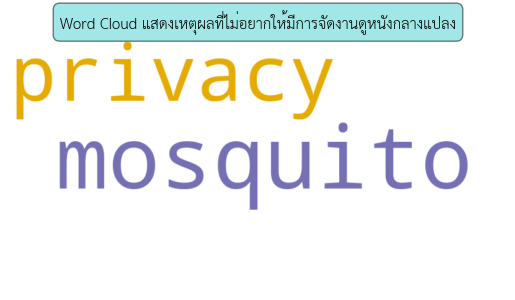

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define the text to be visualized
text = "mosquito, 'privacy"

# Create a word cloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Dark2').generate(text)
# Create a title with a colored rectangle behind it
title = 'Word Cloud แสดงเหตุผลที่ไม่อยากให้มีการจัดงานดูหนังกลางแปลง'
title_box = dict(boxstyle='round', facecolor='#47D1D1', alpha=0.5)
plt.text(0.5, 1.08, title, size=16, ha='center', va='center', transform=plt.gca().transAxes, bbox=title_box)
# Display the word cloud using matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('m_whynot_ac.png', dpi=300)
plt.show()


#GAME

In [ ]:
dfg = df[df['category'] == 'เกม']

##แผนภูมิวงกลมแสดงจำนวนนักศึกษาที่เลือกเกมเพื่อคลายความเครียดจำแนกตามเพศ

In [ ]:
import plotly.express as px
grouped_dfg = df.groupby('gender')['category'].apply(lambda x: (x == 'เกม').sum())
print('รวม : ',grouped_dfg.sum())
print(grouped_dfg.sort_values(ascending=False))
# import plotly.express as px
fig = px.pie(values=grouped_dfg, names=grouped_dfg.index)
fig.update_traces(pull=[0.02]*len(grouped_dfg), textinfo='percent+value',marker=dict(colors=px.colors.qualitative.Plotly))
fig.update_layout(title='แผนภูมิวงกลมแสดงจำนวนนักศึกษาที่เลือกเกมเพื่อคลายความเครียดจำแนกตามเพศ',
                  plot_bgcolor='white',
                  height=500,
                  width=900,
                  font=dict(size=13, color='black', family='Helvetica'),
                  title_font=dict(size=20, color='black', family='Helvetica'),
                  showlegend=True)

fig.show()


## แผนภูมิแท่งแสดงเหตุผลที่นักศึกษาอยากใช้เกมในการคลายความเครียด

In [ ]:
# Group the responses by  category and count the number of responses
dfg = df[df['category'] == 'เกม']
g_ac_counts = dfg['g_choose'].str.split(', ', expand=True).stack().value_counts()
g_ac_counts = g_ac_counts.rename(index = {'เครียดในเกมเเทนเครียดในจริง แต่พอหยุด ก็ต้องยอมรับว่าต้องเผชิญความเครียดไปตามลำพังอยู่ดี' : 'อื่นๆ'})
print(g_ac_counts)
fig = px.bar(x=g_ac_counts.values, y=g_ac_counts.index, orientation='h')

fig.update_layout(
    xaxis_title='ความถี่',
    yaxis_title='ตัวเลือก',
    title={
        'text': 'แผนภูมิแท่งแสดงเหตุผลที่นักศึกษาอยากใช้เกมในการคลายความเครียด',
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='black', family='Helvetica')
    }

)
fig.update_traces(text=(g_ac_counts.values / grouped_dfg.sum()* 100).round(2), textposition='inside')
fig.update_traces(texttemplate='%{text}%', textposition='inside')
fig.show()



## แผนภูมิโดนัทแสดงสัดส่วนของนักศึกษาที่เล่นเกมประเภทเกมต่างๆในแต่ละแพลตฟอร์มเพื่อคลายความเครียด






In [ ]:
dfg_type = dfg.groupby(['g_type'])[['category']].count()
dfg_type = dfg_type.rename(index = {'เกมต่อสู้กันระหว่าง (Moba)' : 'เกมต่อสู้ระหว่างกัน (Moba)'})
dfg_type = dfg_type.rename(index = {'เกมปริศนาไข (Puzzle games)' : 'เกมไขปริศนา (Puzzle games)'})
# plot
fig = plt.figure(figsize=(10,8))
col = ['#FF8F7F','#DC493F','#006EBC','#01A6BA','#75C095','#8A49A1','#009688','#FFDD63','#FFF889']

a = plt.pie(dfg_type['category'], labels = dfg_type.index ,colors = col, autopct='%1.2f%%',
        wedgeprops = {'linewidth': 2.0, 'edgecolor': 'white'}, radius=1, pctdistance = 0.8)

b = plt.pie([50], colors = 'w', radius=0.7)

dfg_platform = dfg.groupby(['g_type','g_platform'])[['category']].count()
dfg_platform2 = dfg.groupby(['g_platform'])[['category']].count()
dfg_platform2 = dfg_platform2.sort_values(by='category', ascending=False)
dfg_platform2 = dfg_platform2.rename(index = {'เกมปริศนาไข (Puzzle games)' : 'เกมไขปริศนา (Puzzle games)'})
# plot
cols = ['#FFDD63','#FFF889']
c = plt.pie(dfg_platform['category'], colors = cols, autopct='%1.2f%%',
        wedgeprops = {'linewidth': 1.5, 'edgecolor': 'white'}, radius=0.65, pctdistance = 0.6)

plt.title('แผนภูมิโดนัทแสดงสัดส่วนของนักศึกษาที่เล่นเกมประเภทเกมต่างๆในแต่ละแพลตฟอร์มเพื่อคลายความเครียด',fontsize=22)

legend = []
for i,j in zip(dfg_type.index,dfg_type['category']):
  lg = '{} : {} คน'.format(i,j)
  legend.append(lg)

legendp=[]
legendp.append("")


legend_platform = []
for i,j in zip(dfg_platform2.index,dfg_platform2['category']):
  lg2 = '{} : {} คน'.format(i,j)
  legend_platform.append(lg2)

# เพิ่ม Legend 2 อันเข้ากับกราฟ
plt.gca().add_artist(plt.legend(legend+legendp+legend_platform,bbox_to_anchor=(0.14, 1.01), fontsize = 10))
plt.savefig('dfg_type_platform.png', dpi=1200)
plt.show()

## แผนภูมิแท่งแสดงความถี่ในการเล่นเกมของนักศึกษาในหนึ่งสัปดาห์โดยแยกตามเพศ

In [ ]:
# Group the data by g_type and gender, and count the number of occurrences for each combination
grouped_df_week_gender = df.groupby(['gender', 'g_fre_week'])['category'].count().unstack()


grouped_df_week_gender.fillna(0, inplace=True)
# Create the line chart
col = ['#04a8f6','#033978','#ba68c8','#ffca28']

fig, ax = plt.subplots(figsize=(15, 5))
grouped_df_week_gender.plot(kind='bar', ax=ax,color=col)


# Set the chart title and axis labels
ax.set_title('แผนภูมิแท่งแสดงความถี่ในการเล่นเกมของนักศึกษาในหนึ่งสัปดาห์โดยแยกตามเพศ', fontsize=22)
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_ylabel('จำนวน(คน)', fontsize=14)
ax.set_xlabel('เพศ', fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0,fontsize=14)
ax.legend(title="ความถี่ต่อสัปดาห์")
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())},({p.get_height()/grouped_df_week_gender.sum().sum() * 100:.1f}%)', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',fontsize=10)
# Display the chart
ax.set_axisbelow(True)
plt.savefig('grouped_df_week_gender.png', dpi=1200)
plt.show()

## แผนภูมิแท่งแสดงความถี่ในการจัดกิจกรรมเกี่ยวกับเกมของมหาวิทยาลัยต่อหนึ่งภาคการศึกษา

In [ ]:
grouped_df_ac = df.groupby('g_fre_ac/1')['category'].count()
order = ['ไม่เคยรู้ว่ามีกิจกรรม','1-2 ครั้ง / เทอม','3-4 ครั้ง / เทอม','มากกว่า 4 ครั้ง / เทอม']

grouped_df_ac.loc['3-4 ครั้ง / เทอม'] = 0
grouped_df_ac.loc['มากกว่า 4 ครั้ง / เทอม'] = 0
grouped_df_ac = grouped_df_ac.loc[order]
grouped_df_ac = grouped_df_ac.iloc[::-1]
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(grouped_df_ac.index, grouped_df_ac.values, color='orange')

# Set the chart title and axis labels
for s in ['top','right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.4)
ax.set_title('แผนภูมิแท่งแสดงความถี่ในการจัดกิจกรรมเกี่ยวกับเกมของมหาวิทยาลัยต่อหนึ่งภาคการศึกษา',fontsize=22)
ax.set_xlabel('จำนวน(คน)',fontsize=14)
ax.set_ylabel('จำนวนครั้งต่อภาคเรียนการศึกษา',fontsize=14)
ax.set_yticklabels(grouped_df_ac.index,fontsize=14)
for i, value in enumerate(grouped_df_ac.values):
    ax.text(value, i, f' {value} ({value/sum(grouped_df_ac.values)*100:.2f}%)', ha='left', va='center')
# Display the chart
ax.set_axisbelow(True)
plt.savefig('grouped_df_ac.png', dpi=1200)
plt.show()


## แผนภูมิวงกลมแสดงแพลตฟอร์มที่นักศึกษาใช้เล่นเกม

In [ ]:
grouped_dfg_g = df.groupby('g_platform')['category'].apply(lambda x: (x == 'เกม').sum())
print(grouped_dfg_g)
fig = px.pie(values=grouped_dfg, names=grouped_dfg.index)
fig.update_layout(title='แผนภูมิวงกลมแสดงแพลตฟอร์มที่นักศึกษาใช้เล่นเกม',title_x=0.47)
fig.show()


## แผนภูมิแท่งแสดงความถี่ที่นักศึกษาอยากให้มหาวิทยาลัยจัดกิจกรรมเกี่ยวกับเกม





In [ ]:
grouped_df_want = df.groupby('g_fre_ac')['category'].count()

grouped_df_want.loc['ไม่อยากให้มีกิจกรรม'] = 0
order = ['ไม่อยากให้มีกิจกรรม','1-2 ครั้ง / เทอม','3-4 ครั้ง / เทอม','มากกว่า 4 ครั้ง / เทอม']
grouped_df_want = grouped_df_want.loc[order]
grouped_df_want = grouped_df_want.iloc[::-1]
# Create the horizontal bar chart
fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(grouped_df_want.index, grouped_df_want.values, color='orange')

# Set the chart title and axis labels
for s in ['top','right']:
    ax.spines[s].set_visible(False)
ax.grid(axis='x', linestyle='--', alpha=0.4)
ax.set_title('แผนภูมิแท่งแสดงความถี่ที่นักศึกษาอยากให้มหาวิทยาลัยจัดกิจกรรมเกี่ยวกับเกม',fontsize=22)
ax.set_xlabel('จำนวน(คน)',fontsize=14)
ax.set_ylabel('จำนวนครั้งต่อภาคเรียนการศึกษา',fontsize=14)
ax.set_yticklabels(grouped_df_want.index,fontsize=14)
for i, value in enumerate(grouped_df_want.values):
    ax.text(value, i, f' {value} ({value/sum(grouped_df_want.values)*100:.2f}%)', ha='left', va='center')
# Display the chart
ax.set_axisbelow(True)
plt.savefig('grouped_df_want.png', dpi=1200)
plt.show()

## แผนภูมิแท่งแสดงกิจกรรมที่นักศึกษาอยากให้มหาวิทยาลัยมีการจัด



In [ ]:
g_activity_counts = dfg['g_activity'].str.split(', ', expand=True).stack().value_counts().reset_index()
g_activity_counts.columns = ['choice', 'frequency']
g_activity_counts = g_activity_counts.drop(index = {5})
g_activity_counts['choice'] = g_activity_counts['choice'].replace({'มีพื้นที่ชวนกันเล่นเกม เช่น open hat/สถานที่/ชมรม แต่ไม่ใช้คำหยาบคายกัน': 'อื่นๆ'})
g_activity_counts['frequency'] = g_activity_counts['frequency'].replace({1: 2})


print(g_activity_counts)
# Calculate the percentage values
g_activity_counts['percentage'] = g_activity_counts['frequency'] / g_activity_counts['frequency'].sum() * 100
g_activity_counts['text'] = g_activity_counts.apply(lambda x: f"{x['frequency']} ({x['percentage']:.1f}%)", axis=1)

fig = px.bar(g_activity_counts, x='frequency', y='choice', orientation='h',
             color='frequency', color_continuous_scale='portland',
             title='แผนภูมิแท่งแสดงกิจกรรมที่นักศึกษาอยากให้มหาวิทยาลัยมีการจัด',
             labels={'frequency':'ความถี่', 'choice':'กิจกรรมที่อยากให้จัดเกี่ยวกับเกม'})
fig.update_layout(
    font=dict(size=12, color='black', family='Helvetica'),
    xaxis=dict(range=[0, g_activity_counts['frequency'].max() + 10],
               title_font=dict(size=14, color='black', family='Helvetica')),
    yaxis=dict(title_font=dict(size=14, color='black', family='Helvetica'), autorange='reversed'),
    margin=dict(l=110, r=60, b=70, t=80),
    height=500,
    width=1200,
    showlegend=False,
    plot_bgcolor='white',
    title_font=dict(size=22, color='black', family='Helvetica'),
    title={
        'text': 'แผนภูมิแท่งแสดงกิจกรรมที่นักศึกษาอยากให้มหาวิทยาลัยมีการจัด',
        'y':0.97,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': dict(size=24, color='black', family='Helvetica')
    }
)



# Add the frequency and percentage values beside the bars
fig.update_traces(text=g_activity_counts['text'], textposition='outside')


##แผนภูมิแท่งแสดงสัดส่วนของช่วงเวลาที่นักศึกษาต้องการให้จัดงานเกี่ยวกับเกมแปลงภายในมหาวิทยาลัย

In [ ]:
dfg = df[df['category'] == 'เกม']
g_when_ac_counts = dfg['g_when_ac'].str.split(', ', expand=True).stack().value_counts()
print(g_when_ac_counts)

fig = px.bar(x=g_when_ac_counts.values, y=g_when_ac_counts.index, orientation='h')

fig.update_layout(
    title='แผนภูมิแท่งแสดงสัดส่วนของช่วงเวลาที่นักศึกษาต้องการให้จัดงานเกี่ยวกับเกมแปลงภายในมหาวิทยาลัย',title_x=0.5,
    xaxis_title='ตัวเลือก',
    yaxis_title='ความถี่'
)
fig.update_traces(text=(g_when_ac_counts.values / grouped_dfg.sum()* 100).round(2), textposition='inside')
fig.update_traces(texttemplate='%{text}%', textposition='inside')
fig.show()